In [1]:
import numpy as np

def metropolis_hastings(target_density, N, initial_state, proposal_width):
    """
    Metropolis-Hastings algorithm with uniform proposal distribution.

    Parameters:
        target_density (function): The target density function to sample from.
        N (int): Number of samples to generate.
        initial_state (float): Initial state of the Markov chain.
        proposal_width (float): Width of the uniform proposal distribution.

    Returns:
        chain (list): Generated Markov chain.
        avg_acceptance_rate (float): Average acceptance rate.
    """
    chain = [initial_state]
    accepted = 0

    for _ in range(N - 1):
        current_state = chain[-1]
        proposal = current_state + np.random.uniform(-proposal_width, proposal_width)
        
        # Calculate acceptance probability
        acceptance_prob = min(1, target_density(proposal) / target_density(current_state))
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            chain.append(proposal)
            accepted += 1
        else:
            chain.append(current_state)

    avg_acceptance_rate = accepted / N
    return chain, avg_acceptance_rate

In [2]:
import matplotlib.pyplot as plt

# Define the target density function
def target_density(x):
    return np.exp(-x**2 / 2)

# Parameters
N = 10000
initial_state = 0
proposal_widths = np.linspace(0.1, 30.0, 400)
acceptance_rates = []

# Run Metropolis-Hastings for different proposal widths
for width in proposal_widths:
    _, avg_acceptance_rate = metropolis_hastings(target_density, N, initial_state, width)
    acceptance_rates.append(avg_acceptance_rate)


/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_5173/2564646080.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


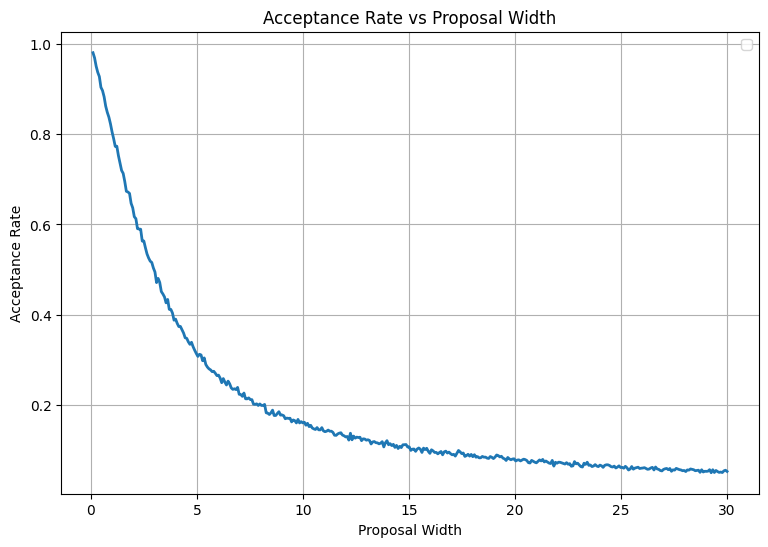

In [3]:
# Plot the results with a thicker line
plt.figure(figsize=(9, 6))
plt.plot(proposal_widths, acceptance_rates, linewidth=2)
plt.xlabel('Proposal Width')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Proposal Width')
plt.grid()
plt.legend()
plt.savefig("accept_vs_step.pdf")

plt.show()

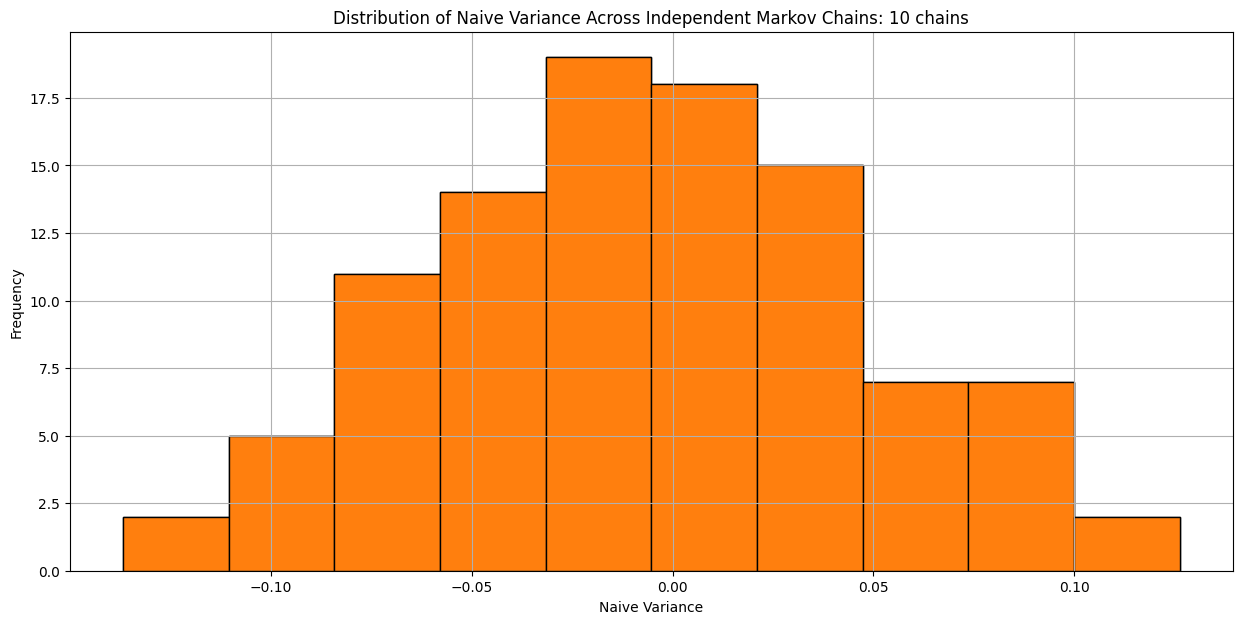

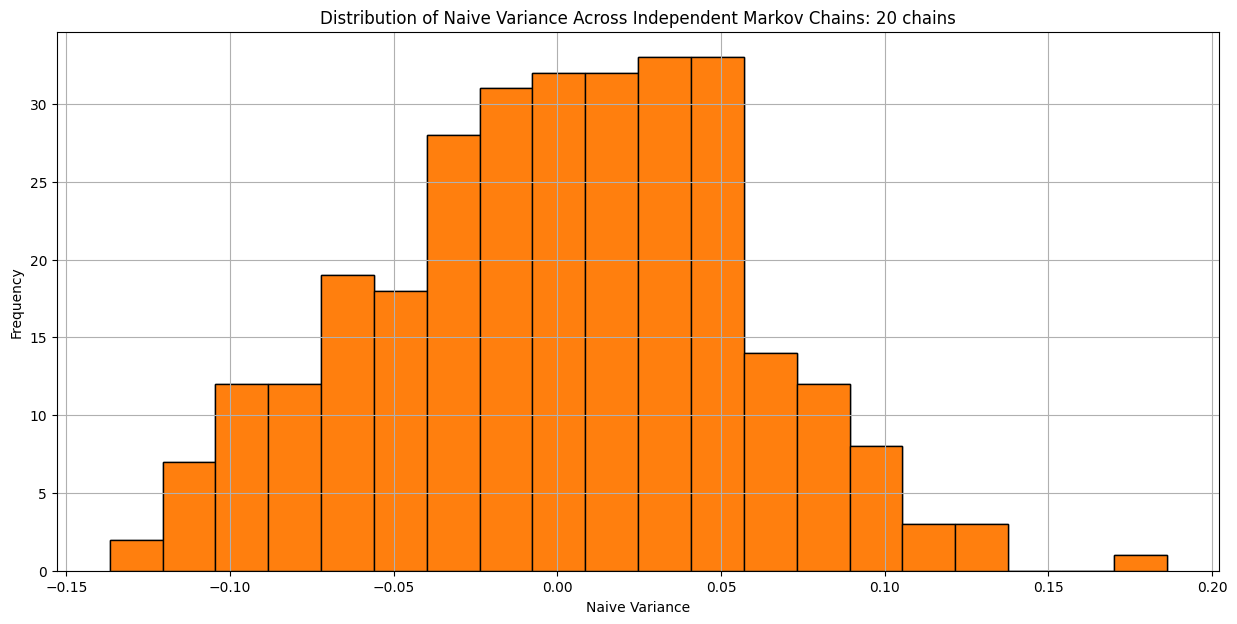

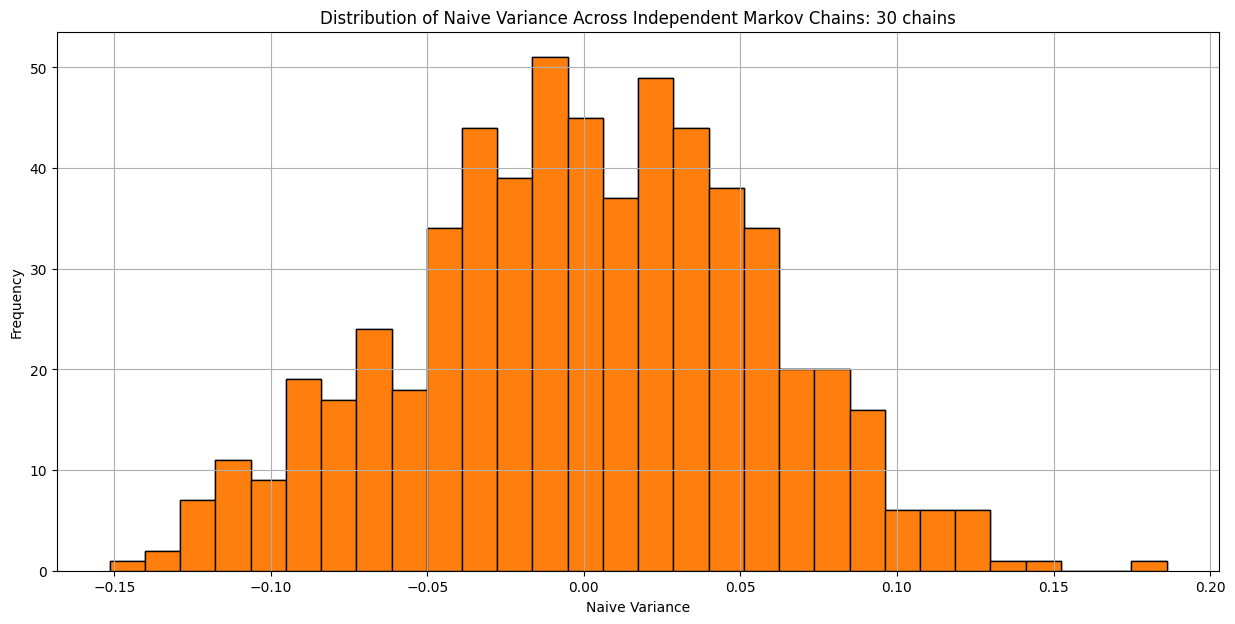

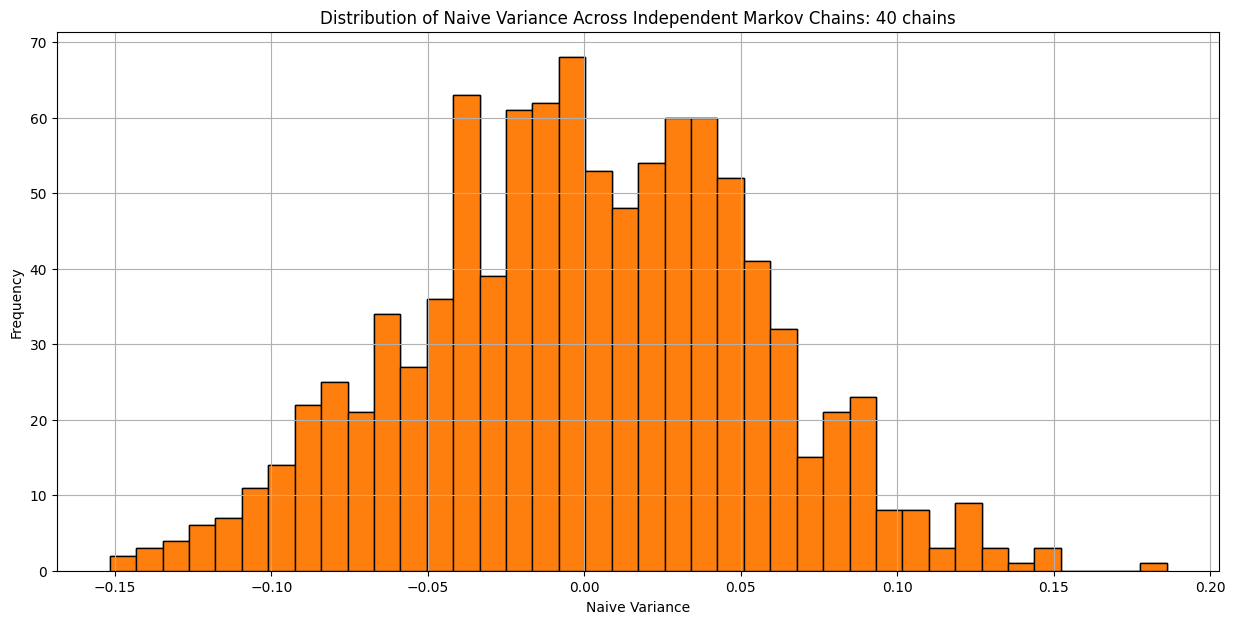

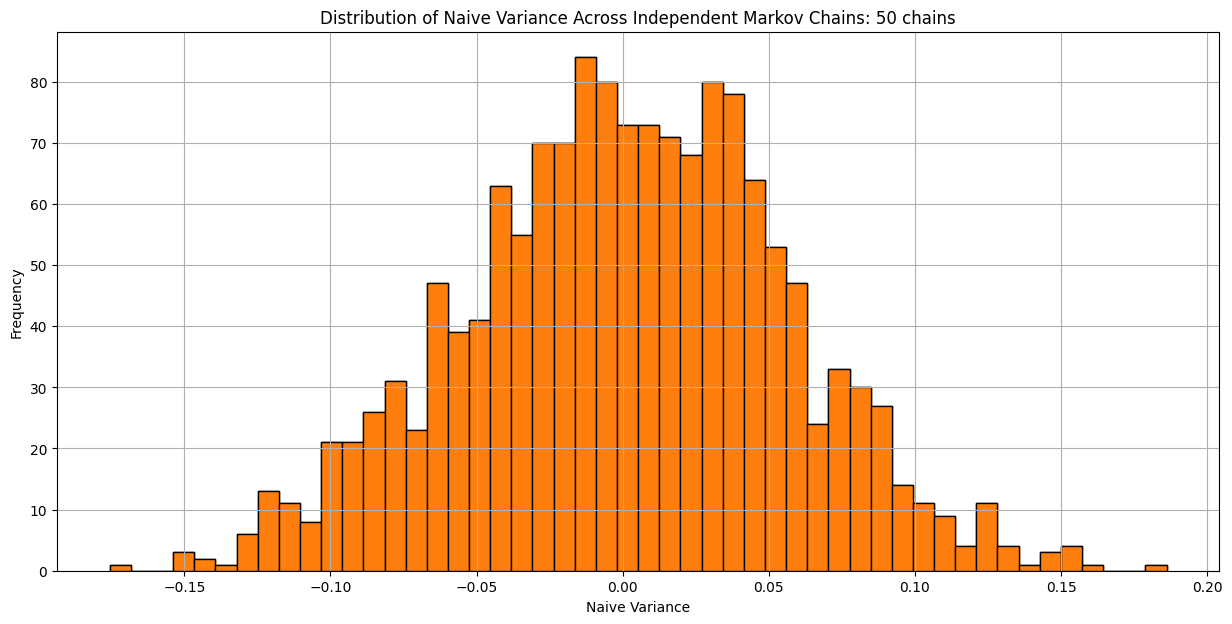

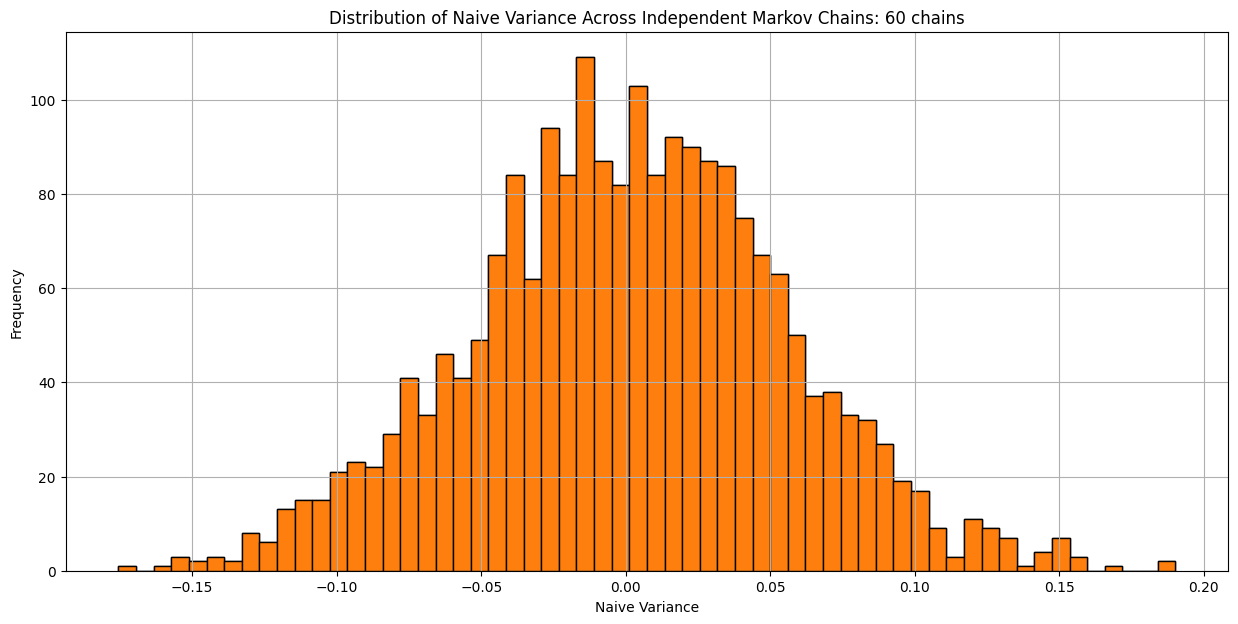

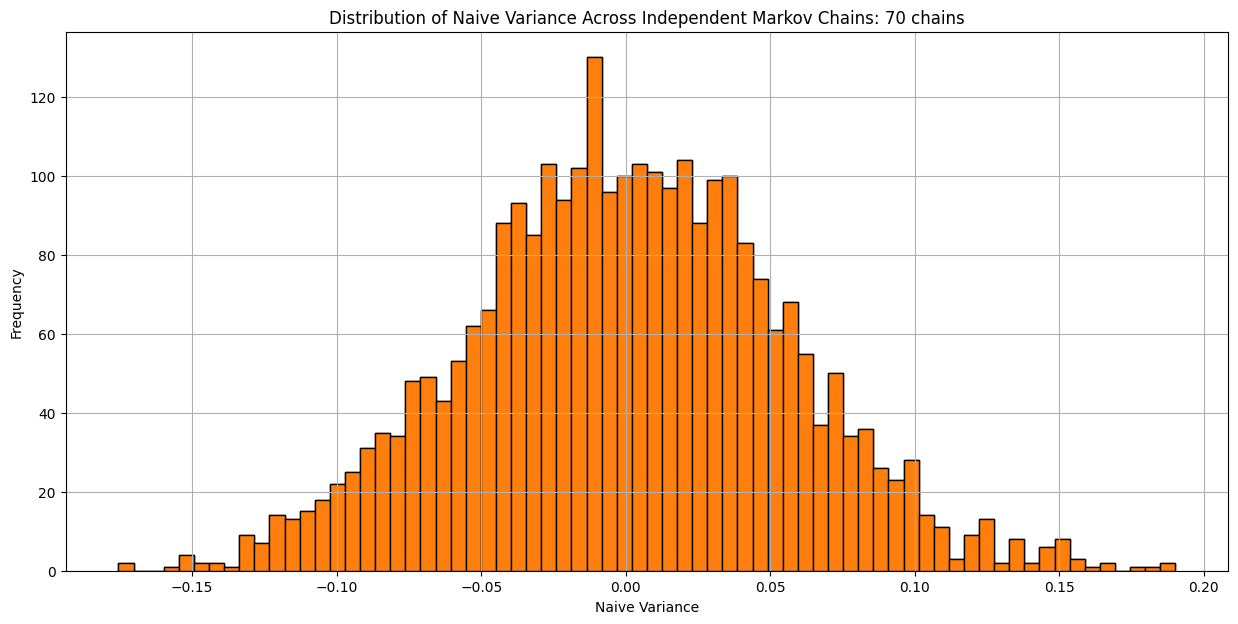

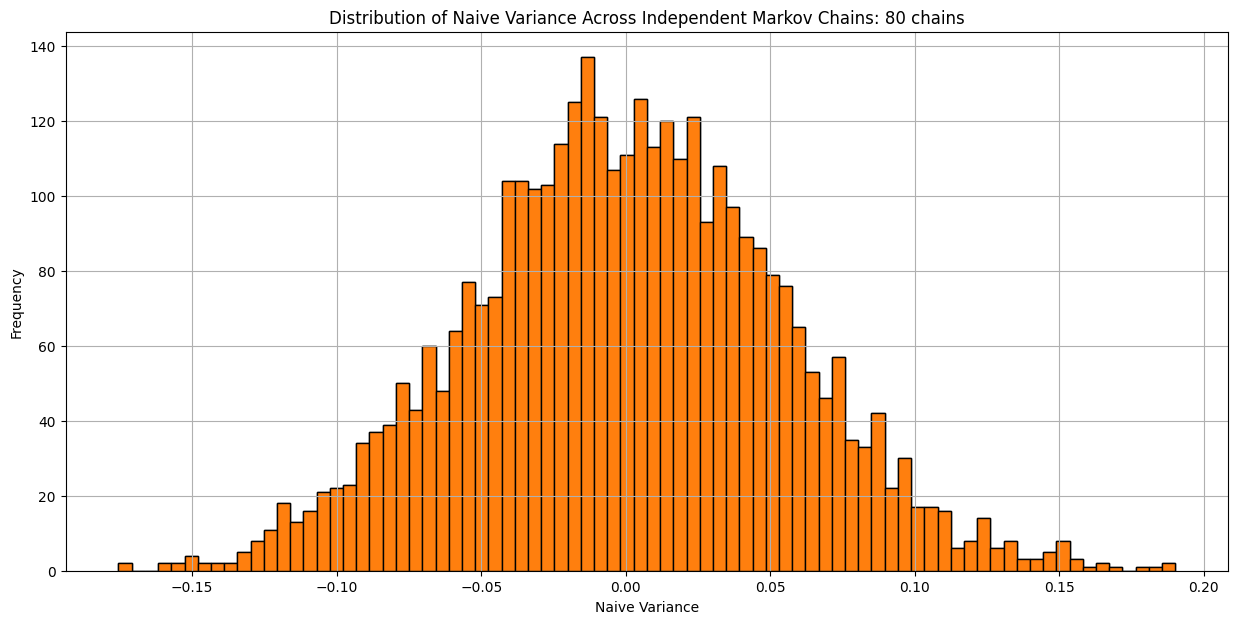

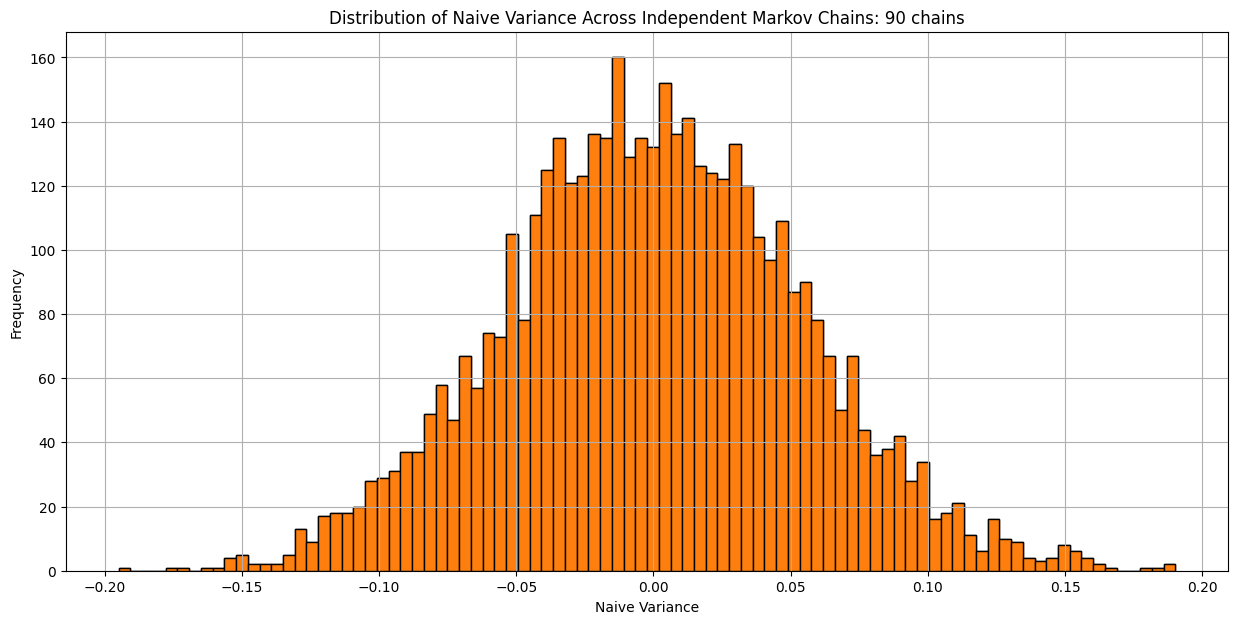

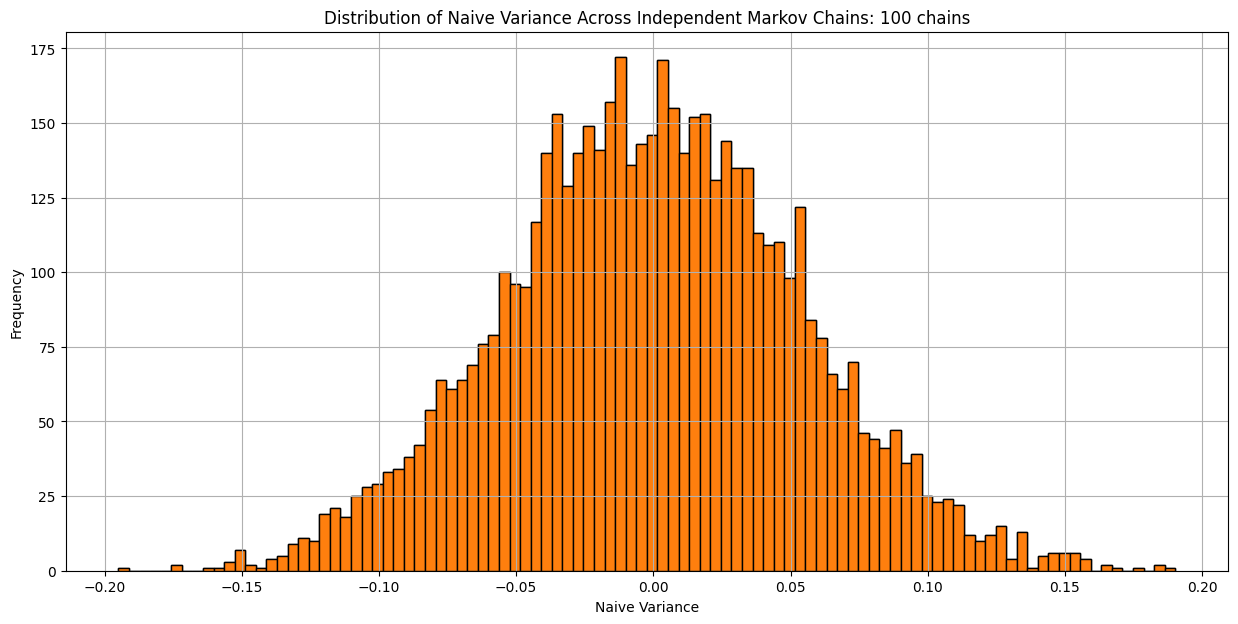

In [4]:
# Generate 50 independent Markov chains and calculate their variances
independent_variances = []
for i in range(1,11):
    for _ in range(100 * i):
        chain, _ = metropolis_hastings(target_density, N, initial_state, width)
        independent_variances.append(np.mean(chain))

    # Normalize the histogram to create a PMF
    plt.figure(figsize=(15, 7))
    plt.hist(independent_variances, bins=(10 * i), edgecolor='black')
    # Plot the distribution of variances in a histogram
    plt.hist(independent_variances, bins=( 10 * i ), edgecolor='black')
    plt.xlabel('Naive Variance')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Naive Variance Across Independent Markov Chains: {10 * i} chains')
    plt.grid()
    plt.show()

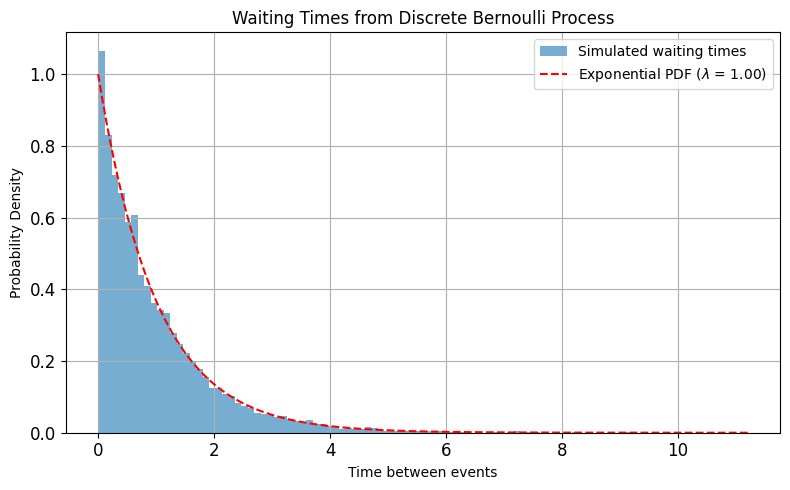

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
p_event = 0.01  # probability of event per time step
num_steps = 1000000
dt = 0.01  # time step size

# Step 1: Simulate independent Bernoulli trials
event_occurs = np.random.rand(num_steps) < p_event
event_indices = np.where(event_occurs)[0]
event_times = event_indices * dt

# Step 2: Calculate inter-arrival (waiting) times
inter_arrival_times = np.diff(event_times)

# Step 3: Plot histogram of waiting times
plt.figure(figsize=(8, 5))
plt.hist(inter_arrival_times, bins=100, density=True, alpha=0.6, label="Simulated waiting times")

# Step 4: Overlay theoretical exponential distribution
lambda_rate = p_event / dt
x = np.linspace(0, np.max(inter_arrival_times), 1000)
pdf = lambda_rate * np.exp(-lambda_rate * x)
plt.plot(x, pdf, 'r--', label=f"Exponential PDF ($\\lambda$ = {lambda_rate:.2f})")

# Finalize plot
plt.title("Waiting Times from Discrete Bernoulli Process")
plt.xlabel("Time between events")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().xaxis.set_tick_params(labelsize=12)
plt.gca().yaxis.set_tick_params(labelsize=12)
# Removed invalid 'labelweight' argument
plt.gca().xaxis.set_tick_params()
plt.gca().yaxis.set_tick_params()
plt.tight_layout()
plt.savefig("waiting_times_histogram.pdf")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/kde_reconstruction.pdf'

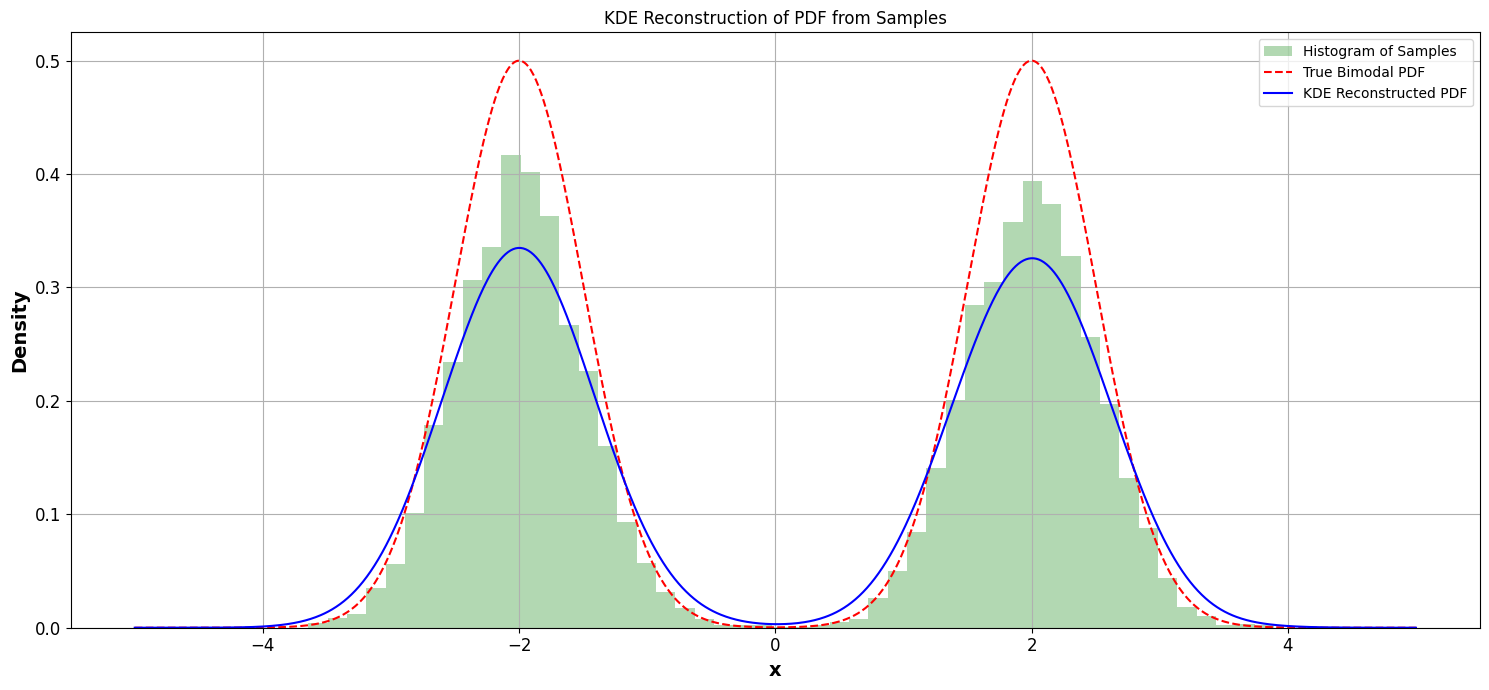

In [6]:
from scipy.stats import gaussian_kde
import numpy as np

import matplotlib.pyplot as plt

# Define a bimodal target distribution
def bimodal_distribution(x):
    return 0.5 * np.exp(-0.5 * ((x - 2) / 0.5)**2) + 0.5 * np.exp(-0.5 * ((x + 2) / 0.5)**2)

# Generate samples from the bimodal distribution
x = np.linspace(-5, 5, 1000)
target_pdf = bimodal_distribution(x)
samples = np.concatenate([np.random.normal(2, 0.5, 5000), np.random.normal(-2, 0.5, 5000)])

# Perform KDE on the samples
kde = gaussian_kde(samples)
kde_pdf = kde(x)



plt.figure(figsize=(15, 7))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().xaxis.set_tick_params(labelsize=12)
plt.gca().yaxis.set_tick_params(labelsize=12)
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('KDE Reconstruction of PDF from Samples', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
# Plot the histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.3, color='green', label='Histogram of Samples')

# Plot the true target PDF
plt.plot(x, target_pdf, 'r--', label='True Bimodal PDF')

# Plot the KDE PDF
plt.plot(x, kde_pdf, 'b-', label='KDE Reconstructed PDF')

# Add labels, legend, and grid
plt.xlabel('x')
plt.ylabel('Density')
plt.title('KDE Reconstruction of PDF from Samples')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Plots/kde_reconstruction.pdf")

# Show the plot
plt.show()